In [3]:
import numpy as np, random, matplotlib.pyplot as plt, copy

In [4]:
#Función que se evalua en el punto 1
def funcionEvaluada(x,y):
    f = -(y+47)*np.sin(np.sqrt(np.abs(y+(x/2)+47)))-x*np.sin(np.sqrt(np.abs(x-(y+47))))
    return f

def toBinaryFloat(num):
    if num >= 0:
        entero, decimal = divmod(num, 1)
        decimal = round(decimal,2)
        decimal = decimal * 100
        decimal = int(decimal)
        entero = int(entero)
        entero_binario = bin(entero)[2:].zfill(10)
        decimal_binario = bin(decimal)[2:].zfill(7)
        signado = '0'
    else: 
        entero, decimal = divmod(np.abs(num), 1)
        decimal = round(decimal,2)
        decimal = decimal * 100
        decimal = int(decimal)
        entero = int(entero)
        entero_binario = bin(entero)[2:].zfill(10)
        decimal_binario = bin(decimal)[2:].zfill(7) 
        signado = '1'

    return signado + entero_binario + decimal_binario
        
def toIntFloat(binario):
    signado = int(binario[0])
    entero = binario[1:11]
    decimal = binario[11:18]

    if signado == 0:
        entero = int(entero,2)
        decimal = int(decimal,2)/100
        float = entero + decimal
        return float
    else:
        entero = int(entero,2)
        decimal = int(decimal,2)/100
        float = entero + decimal
        return -float

def toBinary(num):
    if num >= 0:
        binario = bin(num)[2:].zfill(10)
        signado = '0'
    else:
        binario = bin(np.abs(num))[2:].zfill(10)
        signado = '1'
    return signado + binario

"""
Esta función recibe un string binario de 10 bits que sigue la codificación descrita y lo convierte 
en un número decimal entre -512 y 512. En caso de que el número esté fuera de rango, se retorna 
un mensaje de error.
"""
def toInt(binario):
    signado = int(binario[0])
    bits = binario[1:]
    
    if signado == 0:
        decimal = int(bits, 2)
        return decimal
    else:
        decimal = int(bits,2)
        return -decimal
    
#Alternativa para codificación con complemento a 2
'''    
#Transforma un número entero positivo o negativo a binario de 11 bits
def toBinary(num):
    if num >= 0:
        return bin(num)[2:].zfill(10) # convierte el número a binario y agrega ceros a la izquierda para que tenga 11 bits
    else:
        # convierte el número a su complemento a dos y lo agrega a la cadena de bits
        return bin(1024 + num)[2:]


#Transforma un número binario positivo o negativo de 11 bits a entero
def toInt(bits):
    if bits[0] == '0':
        return int(bits, 2) # convierte la cadena de bits a un número entero en base 2
    else:
        # calcula el complemento 2 y luego convierte a binario
        complement = int(''.join(['1' if bit == '0' else '0' for bit in bits]), 2)
        return -(complement + 1)
'''

'''
Esta función genera la población.
Parametros de entrada:
chromosomes: Es la población de cromosomas a generar. ESCOGER UN VALOR PAR.
genes: Es el número de genes de cada cromosoma.
lowerlimit: Límite inferior del valor que pueden tomar los genes.
upperlimit: Límite superior del valor que pueden tomar los genes.
tipo: Si recibe 'int' genera números enteros, con 'float' genera números de punto flotante

Parametros de salida:
matriz: Matriz poblacional.
'''
def populationGeneration(chromosomes, genes, lowerlimit, upperlimit, tipo):
    if tipo == 'int':
        matriz = np.random.randint(lowerlimit, upperlimit+1, size=(chromosomes, genes))
    elif tipo == 'float':
        matriz = np.random.uniform(lowerlimit, upperlimit+1, size=(chromosomes, genes))
    else:
        print('ingrese una opción de tipo correcta, int o float')
        
    return matriz
'''
Codifica los valores númericos de los cromosomas y los codifica en binario.
Parámetros de entrada:
matriz: Matriz numérica que se desea transformar a binario.
Tipo: Tipo de codificación, int o float.

Parámetros de salida:
matriz_binarios: Matriz de arrays con los números binarios.
'''
def codificacion(matriz:np.ndarray, tipo):
    if tipo == 'int':
        matriz_binarios_str=np.empty((matriz.shape[0],matriz.shape[1]), dtype='U11') #Se crea una matriz nueva tipo string para poder almacenar los valores binarios
        for i in range(matriz.shape[0]):
            for j in range(matriz.shape[1]):
                numero=matriz[i][j]
                binario=toBinary(numero)
                matriz_binarios_str[i][j]=binario
        matriz_binarios=matrizBinaria(matriz_binarios_str)

    elif tipo == 'float':
        matriz_binarios_str=np.empty((matriz.shape[0],matriz.shape[1]), dtype='U18') #Se crea una matriz nueva tipo string para poder almacenar los valores binarios
        for i in range(matriz.shape[0]):
            for j in range(matriz.shape[1]):
                numero=matriz[i][j]
                binario=toBinaryFloat(numero)
                matriz_binarios_str[i][j]=binario
        matriz_binarios=matrizBinaria(matriz_binarios_str)

    return matriz_binarios
'''
Decodifica una matriz array de binarios para convertirlos a valores númericos.
Parámetros de entrada:
matriz: Matriz de arrays binarios.
tipo: Tipo de decodificación, int o float.

Parámetros de salida:
matriz_num: Matriz de los valores númericos.
'''
def decodificacion(matriz:np.ndarray, tipo):
    if tipo == 'int':
        binarios_str=matrizBinariaStr(matriz, tipo)
        matriz_num=np.empty((binarios_str.shape[0],binarios_str.shape[1]), dtype=int)
        for i in range(binarios_str.shape[0]):
            for j in range(binarios_str.shape[1]):
                binario=binarios_str[i][j]
                num=toInt(binario)
                matriz_num[i][j]=num
    elif tipo == 'float':
        binarios_str=matrizBinariaStr(matriz, tipo)
        matriz_num=np.empty((binarios_str.shape[0],binarios_str.shape[1]), dtype=float)
        for i in range(binarios_str.shape[0]):
            for j in range(binarios_str.shape[1]):
                binario=binarios_str[i][j]
                num=toIntFloat(binario)
                matriz_num[i][j]=num
    return matriz_num

'''
Calcula el fitness de la población en la función que se quiere evaluar, así como los valores máximos y mínimos de esta matriz.
Parámetros de entrada:
poblacion: Matriz columna de cromosomas del algoritmo genético.
Parámetros de salida:
matriz_fitness: Matriz columna del resultado del fitness.
'''
def calcularFitness(poblacion:np.ndarray):
    matriz_fitness=np.empty((poblacion.shape[0],1), dtype=float)
    for i in range(poblacion.shape[0]):
        matriz_fitness[i][0]=funcionEvaluada(poblacion[i][0],poblacion[i][1])
    max=np.max(matriz_fitness)
    min=np.min(matriz_fitness)
    return matriz_fitness,max,min

def calcularFitness2(poblacion:np.ndarray):
    matriz_fitness = np.empty((poblacion.shape[0],1), dtype=float)
    for i in range(poblacion.shape[0]):
        sumatoria = 0
        operacion = 0
        for j in range(poblacion.shape[1]):
            operacion = poblacion[i][j] * np.sin(np.sqrt(np.abs(poblacion[i][j])))
            sumatoria = sumatoria + operacion
        matriz_fitness[i][0] = 418.9829 * poblacion.shape[1] - sumatoria
    max = np.max(matriz_fitness)
    min = np.min(matriz_fitness)

    return matriz_fitness, max, min
'''
#Función que se usa en la codificación. Recibe la matriz de cromosoma representada en binarios str, y distribuye los valores en un array.
Parámetros de entrada:
binariostr: Matriz de binarios tipo string.
Parámetros de salida:
bin: Matríz binaria distribuida en un array.
'''
def matrizBinaria(binariostr):
    bin=np.empty((binariostr.shape[0],binariostr.shape[1]),dtype=list) 
    for i in range(binariostr.shape[0]):
        for j in range(binariostr.shape[1]):
            # Convierta la cadena de número binario en un array NumPy
            bin[i][j] = np.array([int(x) for x in binariostr[i][j]])
    return bin
'''
#Función que se usa en la decodificación. Transforma nuevamente la matriz binaria en una matriz de binarios str
Parámetros de entrada:
matriz_binaria: Matriz binaria en forma de array.
Parámetros de salida:
binary_string: Matriz binaria en forma de string.
'''
def matrizBinariaStr(matriz_binaria:np.ndarray, tipo):
    if tipo == 'int':
        binary_string=np.empty((matriz_binaria.shape[0],matriz_binaria.shape[1]), dtype='U11')
    elif tipo == 'float':
        binary_string=np.empty((matriz_binaria.shape[0],matriz_binaria.shape[1]), dtype='U18')
    for i in range(matriz_binaria.shape[0]):
        for j in range(matriz_binaria.shape[1]):
            string=''.join(str(bit) for bit in matriz_binaria[i][j])
            binary_string[i][j] = string
    return binary_string

'''
Recibe un array binario que no está dentro de una matriz y devuelve su valor entero.
Parámetros de entrada:
array_binario: Binario en formato array.
tipo: Si recibe un binario tipo int o float.
Parámetros de salida:
entero: Binario en respuesta entera.
'''
def arrayBinarioToNumber(array_binario:np.ndarray, tipo):
    if tipo == 'int':    
        string=''.join(str(bit) for bit in array_binario)
        entero=toInt(string)
    elif tipo == 'float':
        string=''.join(str(bit) for bit in array_binario)
        entero=toIntFloat(string)
    return entero

'''
Recibe un bit y lo invierte
Párametros de entrada:
bit:Bit que se desea invertir (1 o 0)
Parámetros de salida:
bit_inv: Bit invertido.
'''
def invertirBit(bit:int):
    if bit == 0:
        bit_inv = 1
    else:
        bit_inv = 0
    return bit_inv

'''
Función usada en la mutación. Recibe una lista binaria y la invierte.
Parámetros de entrada:
invertirBit: array que contiene un número binario.
Parámetros de salida:
binario_invertido: El array invertido.
'''
def invertirBinario(binario:np.ndarray):
    binario_invertido_bool = np.logical_not(binario)
    binario_invertido = binario_invertido_bool.astype(int)
    return binario_invertido

'''
Función que se encarga de generar el número de padres mediante la matriz de fitness que recibe como entrada, la elección de los padres depende de si se busca el mínimo o el máximo de una función,
en caso de ser el máximo se eliminan los valores negativos y si se desea buscar el mínimo ocurre lo contrario, es decir, se eliminan los valores positivos.

Parametros de entrada:
matriz_fitness: Matriz numpay que debe contener el resultado de los fitness de los cromosomas evaluados en la función (dimensión nx1).
optimización: Se indica 'max' para buscar el máximo y 'min' para buscar el mínimo.
numero_padres: Se indica la cantidad de padres que se desea obtener.
matriz_cromosomas: Matriz de cromosomas para tomar los valores obtenidos y guardarlos en una nueva matriz de padres (dimensión nx1).

Parametros de salida:
matriz_padres: Matriz con los padres seleccionados por la ruleta.
'''   
'''
def ruleta(matriz_fitness:np.ndarray,optimizacion,numero_padres:int,matriz_cromosomas:np.ndarray):
    #Se define la matriz en donde se mantendran solo los números positivos en caso de búsqueda del máximo y solo los negativos en caso de búsqueda del mínimo
    matriz_refinada=np.empty((matriz_fitness.shape[0],1), dtype=float)
    #Se define la matriz en donde se colocaran los valores para la ruleta
    matriz_ruleta=np.empty((matriz_fitness.shape[0],1), dtype=float)
    #Generación de la ruleta:
    #Condicional para el caso de máximo, se eliminan los valores negativos.
    if optimizacion == 'max':
        for i in range(matriz_fitness.shape[0]):
            if matriz_fitness[i][0] > 0:
                matriz_refinada[i][0] = matriz_fitness[i][0]
            else:
                matriz_refinada[i][0] = 0
        #Sumatoria de los valores de la matriz_refinada
        sumatoria=np.sum(matriz_refinada)
        for i in range(matriz_refinada.shape[0]):
            matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria
    #Condicional para el caso mínimo, se eliminan los valores positivos.
    elif optimizacion == 'min':
        for i in range(matriz_fitness.shape[0]):
            if matriz_fitness[i][0] < 0:
                matriz_refinada[i][0] = np.abs(matriz_fitness[i][0])
            else:
                matriz_refinada[i][0] = 0
        #Sumatoria de los valores de la matriz_refinada
        sumatoria=np.sum(matriz_refinada)
        for i in range(matriz_refinada.shape[0]):
            matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria

    #Creación de la matriz de probabilidad acumulativa
    matriz_probabilidad=np.empty((matriz_ruleta.shape[0],1), dtype=float)
    valor=0
    for i in range(matriz_ruleta.shape[0]):
        valor += matriz_ruleta[i][0]
        matriz_probabilidad[i][0] = valor
    matriz_giro=np.empty((numero_padres,1), dtype=float)
    for i in range(numero_padres):
        matriz_giro[i][0]= np.random.rand()
    
    #Giros de la ruleta
    matriz_padres = np.empty((numero_padres, matriz_cromosomas.shape[1]), dtype=int)
    for i in range(matriz_giro.shape[0]):
        acerto=bool(True)
        #Bandera que recorre la matriz de probabilidad
        g = 0
        while acerto == True:
            if matriz_giro[i][0]<matriz_probabilidad[g][0]:
                matriz_padres[i] = matriz_cromosomas[g]
                acerto = False
            else:
                g+=1     
    return matriz_padres
'''
'''
Esta función se utiliza en ruleta2, permite recalcular la matriz de probabilidad utilizada en el giro al eliminar a los padres que ya se han escogido.
Parámetros de entrada:
matriz_refinada: Matriz numpay que contiene solo los fitness positivos o negativos en caso de busqueda de mínimos y máximos, además, para esta función debe de tener la posición
de los padres escogidos como 0.

Parámetros de salida:
'''
#Calcula el fitness luego de eliminar la posibilidad del padre 
def eliminacionPadre(matriz_refinada:np.ndarray):
    #Se crea una nueva matriz ruleta, se elimina la posibilidad de que se escoja el mismo padre convirtiendo el valor de su fitness en 0
    matriz_ruleta=np.empty((matriz_refinada.shape[0],1), dtype=float)
    sumatoria=np.sum(matriz_refinada)
    for i in range(matriz_refinada.shape[0]):
        matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria
    #Se crea la nueva matriz de probabilidad acumulativa
    matriz_probabilidad=np.empty((matriz_ruleta.shape[0],1), dtype=float)
    valor=0
    for i in range(matriz_ruleta.shape[0]):
        valor += matriz_ruleta[i][0]
        matriz_probabilidad[i][0] = valor
   
    return matriz_probabilidad

'''
Versión 2 de la función ruleta. Se encarga de generar el número de padres mediante la matriz de fitness que recibe como entrada, la elección de los padres depende de si se busca el mínimo o el máximo de una 
función, en caso de ser el máximo se eliminan los valores negativos y si se desea buscar el mínimo ocurre lo contrario, es decir, se eliminan los valores positivos.

Lo que la diferencia de la primera version es que no permite que se escoja un padre repetido, al eliminar el padre seleccionado y recalcular el porcentaje de los padres en la ruleta.

Parametros de entrada:
matriz_fitness: Matriz numpay que debe contener el resultado de los fitness de los cromosomas evaluados en la función (dimensión nx1).
optimización: Se indica 'max' para buscar el máximo y 'min' para buscar el mínimo.
numero_padres: Se indica la cantidad de padres que se desea obtener.
matriz_cromosomas: Matriz de cromosomas para tomar los valores obtenidos y guardarlos en una nueva matriz de padres (dimensión nx1).

Parametros de salida:
matriz_padres: Matriz con los padres seleccionados por la ruleta.
'''   
def ruleta2(matriz_fitness:np.ndarray,optimizacion:str,numero_padres:int,matriz_cromosomas:np.ndarray):
    #Se define la matriz en donde se mantendran solo los números positivos en caso de búsqueda del máximo y solo los negativos en caso de búsqueda del mínimo
    matriz_refinada=np.empty((matriz_fitness.shape[0],1), dtype=float)
    #Se define la matriz en donde se colocaran los valores para la ruleta
    matriz_ruleta=np.empty((matriz_fitness.shape[0],1), dtype=float)
    if optimizacion == 'max':
        for i in range(matriz_fitness.shape[0]):
            if matriz_fitness[i][0] > 0:
                matriz_refinada[i][0] = matriz_fitness[i][0]
            else:
                matriz_refinada[i][0] = 0
        #Sumatoria de los valores de la matriz_refinada
        sumatoria=np.sum(matriz_refinada)
        for i in range(matriz_refinada.shape[0]):
            matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria
    #Condicional para el caso mínimo, se eliminan los valores positivos.
    elif optimizacion == 'min':
        for i in range(matriz_fitness.shape[0]):
            if matriz_fitness[i][0] < 0:
                matriz_refinada[i][0] = np.abs(matriz_fitness[i][0])
            else:
                matriz_refinada[i][0] = 0
        #Sumatoria de los valores de la matriz_refinada
        sumatoria=np.sum(matriz_refinada)
        for i in range(matriz_refinada.shape[0]):
            matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria
    
    #Si se cumple este condicional, significa que se está buscando el mínimo en una población que obtiene como fitness solo valores positivos,
    #o se está buscando el máximo en una poblacion que sólo tiene fitness negativos. En este caso lo que se hace es calcular la matriz_refinada
    #con el inverso de los resultados de la matriz_fitness.
    if np.sum(matriz_refinada) == 0:
        if optimizacion == 'max':
            for i in range(matriz_fitness.shape[0]):
                matriz_refinada[i][0] = 1/np.abs(matriz_fitness[i][0])
            sumatoria = np.sum(matriz_refinada)
            for i in range(matriz_refinada.shape[0]):
                matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria
                
        elif optimizacion == 'min':
            for i in range(matriz_fitness.shape[0]):
                matriz_refinada[i][0] = 1/matriz_fitness[i][0]
            sumatoria = np.sum(matriz_refinada)
            for i in range(matriz_refinada.shape[0]):
                matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria


    #Creación de la matriz de probabilidad acumulativa
    matriz_probabilidad=np.empty((matriz_ruleta.shape[0],1), dtype=float)
    valor=0
    for i in range(matriz_ruleta.shape[0]):
        valor += matriz_ruleta[i][0]
        matriz_probabilidad[i][0] = valor
    matriz_giro=np.empty((numero_padres,1), dtype=float)
    for i in range(numero_padres):
        matriz_giro[i][0]= np.random.rand()
    
    #Giros de la ruleta
    matriz_padres = np.empty((numero_padres, matriz_cromosomas.shape[1]), dtype=float)
    for i in range(matriz_giro.shape[0]):
        acerto=bool(True)
        #Bandera que recorre la matriz de probabilidad
        g = 0
        while acerto == True:
            if matriz_giro[i][0]<matriz_probabilidad[g][0]:
                matriz_padres[i] = matriz_cromosomas[g]
                acerto = False
                #Como ya se escogió este padre, se elimina sus valores para luego ingresar la matriz_refinada a la función eliminaciónPadre, que recalcula la nueva matriz_probabilidad.
                matriz_refinada[g]=0
                matriz_probabilidad[:]=eliminacionPadre(matriz_refinada)
            else:
                g+=1     
    return matriz_padres

#Cruzamiento versión 2
'''
Funcion en donde se realiza el cruce de los genes de los cromosomas.

Parámetros de entrada:
m_padres: Matriz de los padres obtenidos por la selección de la ruleta
poblacion: Población inicial, con la que se definira el número de nuevos hijos
limite_superior: Limite superior que se uso a la hora de crear la población.
limite_inferior: Limite inferior que se uso a la hora de crear la población.
corte_n: Tipo de corte que realizará la función. Ingrese 1 para corte a un punto y 2 para corte a dos puntos.
'''
def cruzamiento(m_padres:np.ndarray,poblacion,limite_superior,limite_inferior,corte_n):
    cromosomas = m_padres.shape[0]
    genes = m_padres.shape[1]
    adn = m_padres[0][0].shape[0]
    matriz_union=np.empty((poblacion,m_padres.shape[1]),dtype=list)
    procrear=int(poblacion/2)
    #Se obtiene un hijo por par de padre y se realiza un ciclo por hijo
    j=0
    for i in range(procrear):
        if corte_n == 2:
            for gen in range(genes):
                rango=bool(True)
                while rango == True:
                    #Siempre serán dos padres, estos se escogen de manera aleatoria
                    padre_uno = random.randint(0, cromosomas-1)
                    #Condicional para no se escoja el mismo cromosoma de la matriz de padres, repe funciona como la bandera
                    repe=True
                    while repe == True:
                        padre_dos = random.randint(0, cromosomas-1)
                        if padre_dos != padre_uno:
                            repe=False
                    #Se realizará el corte a 2 puntos
                    corte1=random.randint(0, adn-1)
                    corte2=random.randint(corte1, adn)
                    #Condición aleatoria para forma de unión
                    h1parte1=m_padres[padre_uno][gen][0:corte1]
                    h1parte2=m_padres[padre_dos][gen][corte1:corte2]
                    h1parte3=m_padres[padre_uno][gen][corte2:adn]
                    hijo1=np.concatenate((h1parte1, h1parte2, h1parte3))
        
                    h2parte1=m_padres[padre_dos][gen][0:corte1]
                    h2parte2=m_padres[padre_uno][gen][corte1:corte2]
                    h2parte3=m_padres[padre_dos][gen][corte2:adn]
                    hijo2=np.concatenate((h2parte1, h2parte2, h2parte3))
                    if (arrayBinarioToNumber(hijo1,'float')<=limite_superior and arrayBinarioToNumber(hijo1,'float')>=limite_inferior) and (arrayBinarioToNumber(hijo2,'float')<=limite_superior and arrayBinarioToNumber(hijo2,'float')>=limite_inferior):
                        rango = False
                matriz_union[j][gen]=hijo1
                matriz_union[j+1][gen]=hijo2
            j=j+2
        elif corte_n == 1:
            for gen in range(genes):
                rango=bool(True)
                while rango == True:
                    #Siempre serán dos padres, estos se escogen de manera aleatoria
                    padre_uno = random.randint(0, cromosomas-1)
                    #Condicional para no se escoja el mismo cromosoma de la matriz de padres, repe funciona como la bandera
                    repe=True
                    while repe == True:
                        padre_dos = random.randint(0, cromosomas-1)
                        if padre_dos != padre_uno:
                            repe=False
                    #Se realizará el corte a 1 punto
                    corte=random.randint(0, adn)
                    h1parte1=m_padres[padre_uno][gen][0:corte]
                    h1parte2=m_padres[padre_dos][gen][corte:adn]
                    hijo1=np.concatenate((h1parte1, h1parte2))
        
                    h2parte1=m_padres[padre_dos][gen][0:corte]
                    h2parte2=m_padres[padre_uno][gen][corte:adn]
                    hijo2=np.concatenate((h2parte1, h2parte2))
                    if (arrayBinarioToNumber(hijo1,'float')<=limite_superior and arrayBinarioToNumber(hijo1,'float')>=limite_inferior) and (arrayBinarioToNumber(hijo2,'float')<=limite_superior and arrayBinarioToNumber(hijo2,'float')>=limite_inferior):
                        rango = False
                matriz_union[j][gen]=hijo1
                matriz_union[j+1][gen]=hijo2
            j=j+2            
        else:
            print('En la función cruzamiento en el parámetro corte ingrese 1 para corte a un punto y 2 para corte a dos puntos')
    return matriz_union

#Cruzamiento versión 1 obsoleta
'''
def cruzamiento(m_padres:np.ndarray,poblacion,limite_superior,limite_inferior,corte_n):
    cromosomas = m_padres.shape[0]
    genes = m_padres.shape[1]
    adn = m_padres[0][0].shape[0]
    matriz_union=np.empty((poblacion,m_padres.shape[1]),dtype=list)
    procrear=int(poblacion/2)
    #Se obtiene un hijo por par de padre y se realiza un ciclo por hijo
    j=0
    for i in range(procrear):
        #Siempre serán dos padres, estos se escogen de manera aleatoria
        padre_uno = random.randint(0, cromosomas-1)
        #Condicional para no se escoja el mismo cromosoma de la matriz de padres, repe funciona como la bandera
        repe=True
        while repe == True:
             padre_dos = random.randint(0, cromosomas-1)
             if padre_dos != padre_uno:
                 repe=False
        if corte_n == 2:
            for gen in range(genes):
                rango=bool(True)
                while rango == True:
                    #Se realizará el corte a 2 puntos
                    #Desde 1 ya que no quiero que haga parta del cruce el bit de signo
                    corte1=random.randint(1, adn-1)
                    corte2=random.randint(corte1, adn)
                    #Condición aleatoria para forma de unión
                    # combinacion=random.randint(0,1)
                    # if combinacion == 0: 
                    h1parte1=m_padres[padre_uno][gen][0:corte1]
                    h1parte2=m_padres[padre_dos][gen][corte1:corte2]
                    h1parte3=m_padres[padre_uno][gen][corte2:adn]
                    hijo1=np.concatenate((h1parte1, h1parte2, h1parte3))
        
                    h2parte1=m_padres[padre_dos][gen][0:corte1]
                    h2parte2=m_padres[padre_uno][gen][corte1:corte2]
                    h2parte3=m_padres[padre_dos][gen][corte2:adn]
                    hijo2=np.concatenate((h2parte1, h2parte2, h2parte3))
                    if (arrayBinarioToNumber(hijo1)<=limite_superior and arrayBinarioToNumber(hijo1)>=limite_inferior) and (arrayBinarioToNumber(hijo2)<=limite_superior and arrayBinarioToNumber(hijo2)>=limite_inferior):
                        rango = False
                matriz_union[j][gen]=hijo1
                matriz_union[j+1][gen]=hijo2
            j=j+2
        elif corte_n == 1:
            for gen in range(genes):
                rango=bool(True)
                while rango == True:
                    #Se realizará el corte a 2 puntos
                    #Desde 1 ya que no quiero que haga parta del cruce el bit de signo
                    corte=random.randint(1, adn)
                    h1parte1=m_padres[padre_uno][gen][0:corte]
                    h1parte2=m_padres[padre_dos][gen][corte:adn]
                    hijo1=np.concatenate((h1parte1, h1parte2))
        
                    h2parte1=m_padres[padre_dos][gen][0:corte]
                    h2parte2=m_padres[padre_uno][gen][corte:adn]
                    hijo2=np.concatenate((h2parte1, h2parte2))
                    if (arrayBinarioToNumber(hijo1)<=limite_superior and arrayBinarioToNumber(hijo1)>=limite_inferior) and (arrayBinarioToNumber(hijo2)<=limite_superior and arrayBinarioToNumber(hijo2)>=limite_inferior):
                        rango = False
                matriz_union[j][gen]=hijo1
                matriz_union[j+1][gen]=hijo2
            j=j+2            
        else:
            print('En la función cruzamiento en el parámetro corte ingrese 1 para corte a un punto y 2 para corte a dos puntos')
    return matriz_union
'''


'''
Función mediante la cuál se realiza la mutación
Parametros de entrada:
matriz_cruzada: Matriz con los hijos de la iteración
porcentaje_mutacion: Porcentaje de la nueva población que se desea mutar, porcentaje entre 10% y 50%. Se debe ingresar el porcentaje como un entero (10 a 50)
mutacion: Tipo de mutación a realizar: 'inversa' si se desea invertir todo el cromosoma. 'bitabit' si se desea invertir bits entre todos los cromosomas.
bits: Número de bits con los que se realizó la codificación de los genes.
'''
def mutacion(matriz_cruzada,porcentaje_mutacion,limite_superior,limite_inferior,mutacion):
    poblacion = matriz_cruzada.shape[0]
    genes = matriz_cruzada.shape[1]
    alelos = matriz_cruzada[0][0].shape[0]
    matriz_mutada=np.empty((poblacion, genes), dtype=list)
    array_dummy=np.zeros(alelos)
    #deepcopy es similar a lo que se hace con la notación [:] y con numpy.copy a la hora de igualar matrices. Se vuelven independientes en memoria, pero también
    #se asegura que las listas dentro de las matrices sean independientes en memoria con un ciclo for interno igualando las listas con [:].
    matriz_mutada=copy.deepcopy(matriz_cruzada)
    if mutacion == 'inversa':
        mutacion_float = np.array((poblacion * (porcentaje_mutacion / 100)) // 1)
        mutacion = mutacion_float.astype(int)
        for i in range(mutacion):
            rango = bool(True)
            while rango == True:
                cromosoma=np.random.randint(0, poblacion)
                gen=np.random.randint(0, genes)
                gen_invertido = invertirBinario(matriz_cruzada[cromosoma][gen])
                array_dummy = gen_invertido
                if arrayBinarioToNumber(array_dummy,'float') <= limite_superior and arrayBinarioToNumber(array_dummy,'float')>= limite_inferior:
                    matriz_mutada[cromosoma][gen] = array_dummy
                    rango = False
    if mutacion == 'bitabit':
        #mutacion_float = np.array((poblacion * genes * (porcentaje_mutacion / 100)) // 1)
        #mutacion = mutacion_float.astype(int)
        matriz_probabilidad=np.empty((matriz_cruzada.shape[0],matriz_cruzada.shape[1]),dtype=float)
        mutacion = porcentaje_mutacion / 100
        #Crea una matriz de probabilidad para aplicar la mutacion
        for i in range(matriz_cruzada.shape[0]):
            for j in range(matriz_cruzada.shape[1]):
                matriz_probabilidad[i][j]= np.random.rand()
        #Ciclo donde se itera la mutacion
        #Si el valor en la posición de la matriz de probabilidad es menor al porcentaje de mutación dado, se invierte un
        #bit aleatorio del cromosoma.
        for i in range(matriz_cruzada.shape[0]):
            for j in range(matriz_cruzada.shape[1]):
                rango = bool(True)
                if matriz_probabilidad[i][j] < mutacion:
                    while rango == True:
                        alelo = np.random.randint(0, alelos)
                        #Se usa un array_dummy para comprobar que se cumplan los límites sin alterar la matriz original
                        array_dummy = np.copy(matriz_cruzada[i][j])
                        bit_invertido = invertirBit(array_dummy[alelo])
                        array_dummy[alelo] = bit_invertido
                        if arrayBinarioToNumber(array_dummy,'float') <= limite_superior and arrayBinarioToNumber(array_dummy,'float')>= limite_inferior:
                            matriz_mutada[i][j] = array_dummy
                            rango = False

    if mutacion == 'bitrandom':
        mutacion_float = np.array((poblacion * genes * (porcentaje_mutacion / 100)) // 1)
        mutacion = mutacion_float.astype(int)
        for i in range(mutacion):
             rango = bool(True)
             while rango == True:
                 cromosoma = np.random.randint(0, poblacion)
                 gen = np.random.randint(0, genes)
                 alelo = np.random.randint(0, alelos)
                 #Se usa un array_dummy para comprobar que se cumplan los límites sin alterar la matriz original
                 array_dummy = np.copy(matriz_cruzada[cromosoma][gen])
                 bit_invertido = invertirBit(array_dummy[alelo])
                 array_dummy[alelo] = bit_invertido
                 if arrayBinarioToNumber(array_dummy,'float') <= limite_superior and arrayBinarioToNumber(array_dummy,'float')>= limite_inferior:
                    matriz_mutada[cromosoma][gen] = array_dummy
                    rango = False

    if mutacion == 'desplazamiento':
        matriz_probabilidad=np.empty((matriz_cruzada.shape[0],matriz_cruzada.shape[1]),dtype=float)
        mutacion = porcentaje_mutacion / 100
        for i in range(matriz_cruzada.shape[0]):
            for j in range(matriz_cruzada.shape[1]):
                matriz_probabilidad[i][j]= np.random.rand()

        for i in range(matriz_cruzada.shape[0]):
            for j in range(matriz_cruzada.shape[1]):
                rango = bool(True)
                if matriz_probabilidad[i][j] < mutacion:
                    while rango == True:
                        #El rango del random se establce de esta manera para que exista un desplazamiento relevante
                        desplazar = np.random.randint(1, alelos-1)
                        array_dummy = np.copy(matriz_cruzada[i][j])
                        array_desplazado = np.concatenate((array_dummy[desplazar:], array_dummy[:desplazar]))
                        if arrayBinarioToNumber(array_desplazado,'float') <= limite_superior and arrayBinarioToNumber(array_desplazado,'float')>= limite_inferior:
                            matriz_mutada[i][j] = array_desplazado
    return matriz_mutada


def calcularDelta(actual, nuevo):
    Delta=np.abs((actual-nuevo)/nuevo)

    return Delta 


def evaluacion(Fitness:np.ndarray, NuevoFitness:np.ndarray, metodo:str):
    if metodo == 'promedio':
        promedio_fitness=np.mean(Fitness)
        #print(promedio_fitness)
        promedio_nuevo_fitness=np.mean(NuevoFitness)
        #print(promedio_nuevo_fitness)
        Delta=calcularDelta(promedio_fitness, promedio_nuevo_fitness)
        return Delta
    elif metodo == 'mse':
        mse = np.mean((Fitness - NuevoFitness)**2)
        return mse
    elif metodo == 'nuevo':
        max=np.max(Fitness)
        nuevo_max=np.max(NuevoFitness)
        Delta=calcularDelta(max,nuevo_max)
        return Delta
    else:
        print('escoja un metodo de evaluación dentro de los posibles')
        return

# Punto 1

In [94]:
#Población planteda o cromosomas
NumeroPoblacion = 2000
#Variables de la función a optimizar o genes
Variables = 2
#Limite inferior
LimiteInferior = -512
#Limite superior
LimiteSuperior = 512
#Numero de padres
NumeroPadres = 400
#Optimización 'max' o 'min'
Optimizacion = 'max'
#Mutacion de 10% hasta 50%. Ingresar el entero
PorcentajeMutacion = 40
#Cuando iterar se vuelva False significa que se "alcanzo" el valor optimizado
iterar=bool(True)
#Bandera para terminar con el ciclado luego de 1000 iteraciones (caso máximo)
ciclo=0
#Iteraciones que quiero realizar
iteraciones=100
#Población inicial
#Poblacion = populationGeneration(NumeroPoblacion,Variables,LimiteInferior,LimiteSuperior,'float')
#Banderas
opti=np.empty((0,), dtype=float)
ciclos=np.empty((0,), dtype=int)
MaxGanador=0
MinGanador=0
#Banderas para repetir varias veces
repeticion = 0
repeticiones = np.empty((0,), dtype=int)
resultado=np.empty((0,), dtype=float)

#Para obtener una gráfica de error correcta solo se debe hacer el ciclo una vez.
#while repeticion == 0:
while repeticion <= 4:
    #Poblacion inicial
    Poblacion = populationGeneration(NumeroPoblacion,Variables,LimiteInferior,LimiteSuperior,'float')
    while iterar == True and ciclo <= iteraciones:
        Fitness, Max, Min = calcularFitness(Poblacion)
        MatrizPadres = ruleta2(Fitness,Optimizacion,NumeroPadres,Poblacion)
        CodificacionBinaria = codificacion(MatrizPadres,'float')
        MatrizCruces = cruzamiento(CodificacionBinaria,NumeroPoblacion,LimiteSuperior,LimiteInferior,2)
        MatrizMutada = mutacion(MatrizCruces,PorcentajeMutacion,LimiteSuperior,LimiteInferior,'bitabit')
        NuevaPoblacion = decodificacion(MatrizMutada,'float')
        NuevoFitness, NuevoMax, NuevoMin = calcularFitness(NuevaPoblacion)

        if Optimizacion == 'max':
            if evaluacion(Fitness, NuevoFitness,'mse') < 0.00001:
                print('El valor máximo es:')
                print(NuevoMax)
                iterar = False
            else:
                Poblacion[:] = NuevaPoblacion
                opti=np.append(opti,evaluacion(Fitness,NuevoFitness,'promedio'))
                ciclo+=1
                ciclos=np.append(ciclos,ciclo)
                if NuevoMax > MaxGanador:
                    MaxGanador = NuevoMax
                    #print('Mejor Max')
                    #print(MaxGanador)
                    
        elif Optimizacion == 'min':
            if evaluacion(Fitness, NuevoFitness,'mse') < 0.01:
                print('El valor mínimo es:')
                print(NuevoMin)
                iterar = False
            else:
                Poblacion[:] = NuevaPoblacion
                opti=np.append(opti,evaluacion(Fitness, NuevoFitness,'promedio'))
                ciclo+=1
                ciclos=np.append(ciclos,ciclo)
                if NuevoMin < MinGanador:
                    MinGanador = NuevoMin
                    #print('Mejor Min')
                    #print(MinGanador)
        #print('ciclo:',ciclo)
        if ciclo == iteraciones:
            if Optimizacion == 'min':
                print('El valor mínimo alcanzado es: ', MinGanador)
            else:
                print('El valor máximo alcanzado es: ', MaxGanador)
    repeticion += 1
    repeticiones = np.append(repeticiones,repeticion)
    if Optimizacion == 'min':
        resultado = np.append(resultado,np.abs(MinGanador))
    else:
        resultado = np.append(resultado, MaxGanador)
    iterar = True
    ciclo = 0


El valor máximo alcanzado es:  1043.935826167204
El valor máximo alcanzado es:  1043.935826167204
El valor máximo alcanzado es:  1043.935826167204
El valor máximo alcanzado es:  1043.935826167204
El valor máximo alcanzado es:  1046.0885096179393


In [95]:
print(resultado)

[1043.93582617 1043.93582617 1043.93582617 1043.93582617 1046.08850962]


In [49]:
print(repeticiones)

[ 1  2  3  4  5  6  7  8  9 10 11]


Text(0, 0.5, 'error')

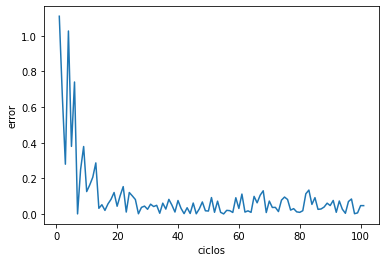

In [80]:
x = ciclos
y = opti
plt.plot(x,y)
plt.xlabel('ciclos')
plt.ylabel('error')

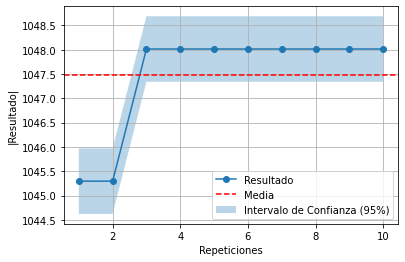

In [91]:
# Calcular la media y el desvío estándar de los resultados

media = np.mean(resultado)
desvio = np.std(resultado)

# Calcular el intervalo de confianza del 95%
n = len(resultado)
z_score = 1.96  # Valor crítico para un intervalo de confianza del 95%
intervalo_confianza = z_score * (desvio / np.sqrt(n))

# Graficar los resultados
plt.plot(repeticiones, resultado, 'o-', label='Resultado')
plt.axhline(media, color='r', linestyle='--', label='Media')
plt.fill_between(repeticiones, resultado - intervalo_confianza, resultado + intervalo_confianza, alpha=0.3, label='Intervalo de Confianza (95%)')
plt.xlabel('Repeticiones')
plt.ylabel('|Resultado|')
plt.legend()
plt.grid(True)
plt.show()

# Punto 2


In [185]:
#Población planteda o cromosomas
NumeroPoblacion2 = 3000
#Variables de la función a optimizar o genes
Variables2 = 15
#Limite inferior
LimiteInferior2 = -500
#Limite superior
LimiteSuperior2 = 500
#Numero de padres
NumeroPadres2 = 600
#Optimización 'max' o 'min'
Optimizacion2 = 'min'
#Mutacion de 10% hasta 50%. Ingresar el entero
PorcentajeMutacion2 = 50
#Cuando iterar se vuelva False significa que se "alcanzo" el valor optimizado
iterar2 =bool(True)
#Bandera para terminar con el ciclado luego de 1000 iteraciones (caso máximo)
ciclo2 =0
#Iteraciones que quiero realizar
iteraciones2 = 100
#Banderas
opti2=np.empty((0,), dtype=float)
ciclos2=np.empty((0,), dtype=int)
MaxGanador2=0
MinGanador2=0
#Banderas para repetir varias veces
repeticion = 0
repeticiones = np.empty((0,), dtype=int)
resultado=np.empty((0,), dtype=float)



#Para obtener una gráfica de error correcta solo se debe hacer el ciclo una vez.
#while repeticion == 0:
while repeticion <= 2:
    #Bandera para el mínimo
    #Esta bandera existe para que MinGanador no parta valiendo 0, en la primera iteración tomará el valor del NuevoMin calculado.
    #Esto se agrega ya que en este caso se está buscando un mínimo entre valores positivos y como está la lógica del algoritmo, no se puede encontrar el mejor mínimo sin esto.
    minimo_bandera = bool(True)

    #Población inicial
    Poblacion2 = populationGeneration(NumeroPoblacion2,Variables2,LimiteInferior2,LimiteSuperior2,'float')
    while iterar2 == True and ciclo2 <= iteraciones2:
        Fitness2, Max2, Min2 = calcularFitness2(Poblacion2)
        MatrizPadres2 = ruleta2(Fitness2,Optimizacion2,NumeroPadres2,Poblacion2)
        CodificacionBinaria2 = codificacion(MatrizPadres2,'float')
        MatrizCruces2 = cruzamiento(CodificacionBinaria2,NumeroPoblacion2,LimiteSuperior2,LimiteInferior2,2)
        MatrizMutada2 = mutacion(MatrizCruces2,PorcentajeMutacion2,LimiteSuperior2,LimiteInferior2,'bitabit')
        NuevaPoblacion2 = decodificacion(MatrizMutada2,'float')
        NuevoFitness2, NuevoMax2, NuevoMin2 = calcularFitness2(NuevaPoblacion2)

        if Optimizacion2 == 'max':
            if evaluacion(Fitness2, NuevoFitness2,'mse') < 0.00001:
                print('El valor máximo es:')
                print(NuevoMax2)
                iterar2 = False
            else:
                Poblacion2[:] = NuevaPoblacion2
                opti2=np.append(opti2,evaluacion(Fitness2,NuevoFitness2,'nuevo'))
                ciclo2+=1
                ciclos2=np.append(ciclos2,ciclo2)
                if NuevoMax2 > MaxGanador2:
                    MaxGanador2 = NuevoMax2
                    #print('Mejor Max')
                    #print(MaxGanador2)
                    
        elif Optimizacion2 == 'min':
            if evaluacion(Fitness2, NuevoFitness2,'mse') < 0.00001:
                print('El valor mínimo es:')
                print(NuevoMin2)
                iterar2 = False
            else:
                Poblacion2[:] = NuevaPoblacion2
                opti2=np.append(opti2,evaluacion(Fitness2, NuevoFitness2,'nuevo'))
                ciclo2+=1
                ciclos2=np.append(ciclos2,ciclo2)
                if minimo_bandera == True:
                    MinGanador2 = NuevoMin2
                if NuevoMin2 < MinGanador2:
                    MinGanador2 = NuevoMin2
                    #print('Mejor Min')
                    #print(MinGanador)
        #print('ciclo:',ciclo)
        #Esta bandera existe para que MinGanador no parta valiendo 0, sino el valor minimo de la primera iteración, es
        minimo_bandera = False
        if ciclo2 == iteraciones2:
            if Optimizacion2 == 'min':
                print('El valor mínimo alcanzado es: ', MinGanador2)
            else:
                print('El valor máximo alcanzado es: ', MaxGanador2)
    repeticion += 1
    repeticiones = np.append(repeticiones,repeticion)
    if Optimizacion2 == 'min':
        resultado = np.append(resultado,np.abs(MinGanador2))
    else:
        resultado = np.append(resultado, MaxGanador2)
    iterar2 = True
    ciclo2 = 0

C:\PROGRA~1\KMSpico\temp/ipykernel_26272/3340522238.py:402: RuntimeWarning: invalid value encountered in scalar divide
  matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria


El valor mínimo alcanzado es:  2514.3904101417247
El valor mínimo alcanzado es:  2292.6774424381824
El valor mínimo alcanzado es:  2667.1087163868565


In [187]:
print(resultado)

[2514.39041014 2292.67744244 2667.10871639]


Text(0, 0.5, 'error')

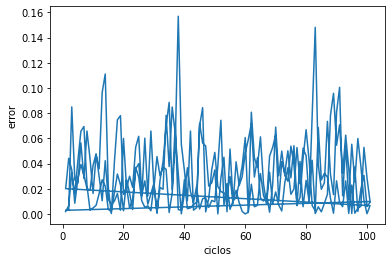

In [188]:
x = ciclos2
y = opti2
plt.plot(x,y)
plt.xlabel('ciclos')
plt.ylabel('error')

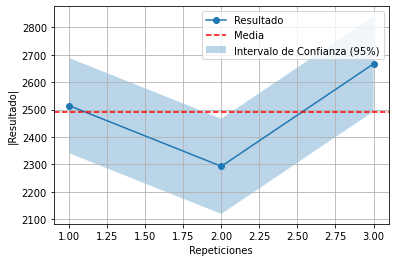

In [186]:
# Calcular la media y el desvío estándar de los resultados

media = np.mean(resultado)
desvio = np.std(resultado)

# Calcular el intervalo de confianza del 95%
n = len(resultado)
z_score = 1.96  # Valor crítico para un intervalo de confianza del 95%
intervalo_confianza = z_score * (desvio / np.sqrt(n))

# Graficar los resultados
plt.plot(repeticiones, resultado, 'o-', label='Resultado')
plt.axhline(media, color='r', linestyle='--', label='Media')
plt.fill_between(repeticiones, resultado - intervalo_confianza, resultado + intervalo_confianza, alpha=0.3, label='Intervalo de Confianza (95%)')
plt.xlabel('Repeticiones')
plt.ylabel('|Resultado|')
plt.legend()
plt.grid(True)
plt.show()

## Pruebas punto 2

In [147]:
#Población planteda o cromosomas
NumeroPoblacion = 10
#Variables de la función a optimizar o genes
Variables = 15
#Limite inferior
LimiteInferior = -500
#Limite superior
LimiteSuperior = 500
#Numero de padres
NumeroPadres = 4
#Optimización 'max' o 'min'
Optimizacion = 'min'
#Mutacion de 10% hasta 50%. Ingresar el entero
PorcentajeMutacion = 10
#Cuando iterar se vuelva False significa que se "alcanzo" el valor optimizado
iterar=bool(True)
#Bandera para terminar con el ciclado luego de 1000 iteraciones (caso máximo)
ciclo=0

In [148]:
Poblacion = populationGeneration(NumeroPoblacion,Variables,LimiteInferior,LimiteSuperior,'float')
Poblacion

array([[ 4.91403226e+02, -1.95654632e+02,  1.48655069e+02,
        -7.22761354e+00,  2.40613928e+01,  1.82257161e+02,
         2.89573716e+02,  3.56194837e+02, -2.78653888e+02,
         2.25112240e+02, -1.83927407e+02,  4.77234935e+01,
         9.26365948e+01,  3.58511629e+02,  2.61232678e+02],
       [-2.39826241e+02,  1.06921419e+02,  2.64472580e+02,
        -9.93868247e+01,  1.74883536e+02,  4.14038440e+02,
         4.92136520e+02, -1.31979738e+02,  9.62161471e+01,
         3.72122492e+01, -1.16310324e+01,  3.22080730e+01,
        -1.88638500e+02,  1.90614170e+02,  4.65621175e+02],
       [ 4.67936785e+02, -1.97076750e+02, -1.48121162e+01,
         2.13641548e+02, -3.63181271e+02,  2.77275007e+02,
        -1.64199803e+02, -2.01427386e+02, -4.66613436e+02,
        -4.55085054e+02,  6.51812095e+01,  2.94923053e+02,
         3.53170663e+02, -3.78830398e+02,  3.76639002e+02],
       [ 3.12118933e+02,  2.37267869e+01, -3.99718924e+02,
        -2.07178746e+02,  3.39608332e+02, -1.69591860

In [149]:
Fitness, Max, Min = calcularFitness2(Poblacion)
print(Fitness)


[[6621.58057488]
 [5832.84104072]
 [7382.3854152 ]
 [8353.37957506]
 [7230.83503843]
 [5093.67188483]
 [6581.72457367]
 [5777.80885621]
 [6862.16071805]
 [6279.89512653]]


In [160]:
MatrizPadres=ruleta2(Fitness,Optimizacion,NumeroPadres,Poblacion)
print(MatrizPadres)

[[-329.86541116  322.14617251  -11.34847026 -262.32877269  359.8478368
   475.29613342   30.09097015  204.94033997  355.86641827 -377.24033705
   420.35060774   47.08109742 -350.47536244  302.26052382 -127.77384105]
 [ 213.82098756  -78.61014605 -388.52982539 -126.83859971 -348.12623007
     7.10276655  -70.86291496 -294.16587318  415.75613175 -272.33750693
   378.17842602 -164.13542278  185.51551252   31.55019502  156.33787567]
 [ -33.44266585 -319.14142369 -373.42637122  -18.00808654 -105.54333446
   217.58169788  144.67307517 -150.70797884  146.27989389 -455.65238779
  -187.6017643   -11.09318917  159.70222394  266.74313446  -38.73397901]
 [ 467.936785   -197.0767502   -14.81211624  213.64154802 -363.18127089
   277.27500689 -164.19980318 -201.427386   -466.61343572 -455.08505396
    65.1812095   294.92305272  353.17066291 -378.83039839  376.63900224]]


C:\PROGRA~1\KMSpico\temp/ipykernel_26272/3340522238.py:402: RuntimeWarning: invalid value encountered in scalar divide
  matriz_ruleta[i][0]=matriz_refinada[i][0]/sumatoria


In [161]:
CodificacionBinaria=codificacion(MatrizPadres,'float')
print(CodificacionBinaria)

[[array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])
  array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])
  array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1])
  array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])
  array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])
  array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])
  array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])
  array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])
  array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1])
  array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])
  array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])
  array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])
  array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
  array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])
  array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])]
 [array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 

In [162]:
MatrizCruces = cruzamiento(CodificacionBinaria, NumeroPoblacion,LimiteSuperior,LimiteInferior,2)
print(MatrizCruces)

[[array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])
  array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])
  array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])
  array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1])
  array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])
  array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0])
  array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])
  array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])
  array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])
  array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])
  array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])
  array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0])
  array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0])
  array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])
  array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])]
 [array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [163]:
MatrizMutada=mutacion(MatrizCruces,PorcentajeMutacion,LimiteSuperior,LimiteInferior,'bitabit')

In [164]:
NuevaPoblacion = decodificacion(MatrizMutada,'float')
print(NuevaPoblacion)

[[ 468.26 -199.14  -11.17 -262.33  359.54    7.26 -100.2  -294.17  415.76
  -377.24  378.2   294.92  355.7   302.26  380.32]
 [ -33.12 -317.08  -14.99  -18.01 -105.85  277.12 -134.86 -201.43  146.28
  -455.09 -171.58 -160.14  157.17 -378.83  152.66]
 [ 465.86   78.63 -375.35 -126.84  359.93  475.3   -70.86 -148.95 -466.61
  -272.24  378.18  -47.1   159.7  -378.82  -38.74]
 [-331.95 -322.13   -9.43  213.64 -348.05  277.28  144.67  206.7   415.76
  -377.34  193.18  164.12 -350.48  302.27  156.33]
 [ 213.82  -78.47 -373.35  222.92 -296.18  475.3  -164.16 -294.17  354.31
  -273.08   65.19 -295.13  353.01   26.74  156.66]
 [-329.87  322.29  -11.43 -117.64 -351.13  217.57   30.13  204.94  147.84
  -454.35  420.34   10.92  159.87 -271.55  -38.41]
 [ 467.94  322.61  -10.81   -6.01 -363.2   475.3  -164.2  -150.71  130.28
  -377.09 -164.6    11.08  225.17  266.74 -127.77]
 [ 213.82  -78.11  -15.35 -274.35  359.83    7.1   -70.94 -294.17  371.87
  -455.24  443.35  -47.09  287.7  -378.83  376.64]


In [165]:
NuevoFitness, NuevoMax, NuevoMin = calcularFitness2(NuevaPoblacion)
print(NuevoFitness)

[[5742.00290408]
 [6903.36837761]
 [5999.13314296]
 [5506.54643593]
 [5020.68475952]
 [5531.95569441]
 [6611.28724744]
 [5724.81094474]
 [7031.43661969]
 [7664.17337522]]


In [166]:
print(NuevoMin)

5020.684759517827


In [ ]:
x = ciclos2
y = opti2
plt.plot(x,y)
plt.xlabel('ciclos')
plt.ylabel('error')

# Pruebas punto 1

In [101]:
#Población planteda o cromosomas
NumeroPoblacion = 20
#Variables de la función a optimizar o genes
Variables = 2
#Limite inferior
LimiteInferior = -512
#Limite superior
LimiteSuperior = 512
#Numero de padres
NumeroPadres = 4
#Optimización 'max' o 'min'
Optimizacion = 'max'
#Mutacion de 10% hasta 50%. Ingresar el entero
PorcentajeMutacion = 10
#Cuando iterar se vuelva False significa que se "alcanzo" el valor optimizado
iterar=bool(True)
#Bandera para terminar con el ciclado luego de 1000 iteraciones (caso máximo)
ciclo=0


In [120]:
#Población inicial
Poblacion = populationGeneration(NumeroPoblacion,Variables,LimiteInferior,LimiteSuperior,'float')
print(Poblacion)

[[  60.30521611  -36.20419564]
 [ 431.26027414 -374.7584481 ]
 [ 146.63600156  474.21791397]
 [  75.53375876  -39.96002692]
 [ 403.40781869  216.76514704]
 [ 224.38989302  -30.37857007]
 [-144.51694393  131.53645644]
 [ -31.34580416  172.5107142 ]
 [ 370.1277049  -395.89131668]
 [ 465.38050929   69.89720346]
 [ 359.37869921  248.20358256]
 [ 405.60251136  -56.13086911]
 [ 488.26276846  439.64437917]
 [ 175.87622661  147.13219111]
 [ 283.3943289   134.87081727]
 [-139.18611531 -204.69438674]
 [ 250.271015    365.65983538]
 [ 397.12825012  411.29043921]
 [-245.38632812 -207.56267233]
 [ 143.74883824 -144.74317619]]


In [121]:
Fitness, Max, Min = calcularFitness(Poblacion)
print(Fitness)
print(Max)
print(Min)

[[ -42.49181126]
 [-586.72218428]
 [ 284.255276  ]
 [ -71.71384125]
 [ 168.08849995]
 [-200.24575249]
 [  27.0942241 ]
 [-221.44131508]
 [-287.2446296 ]
 [ 101.89747514]
 [-413.35158472]
 [-396.0718362 ]
 [-927.14369128]
 [ 330.99898619]
 [ 309.77107654]
 [ -34.48801824]
 [ 340.48343784]
 [-615.18743126]
 [ -92.37397109]
 [-115.02490358]]
340.48343783926794
-927.1436912805357


In [135]:
MatrizPadres = ruleta2(Fitness,Optimizacion,NumeroPadres,Poblacion)
print(MatrizPadres)

[[283.3943289  134.87081727]
 [250.271015   365.65983538]
 [175.87622661 147.13219111]
 [146.63600156 474.21791397]]


In [139]:
CodificacionBinaria = codificacion(MatrizPadres,'float')
print(CodificacionBinaria)

[[array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1])
  array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])]
 [array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])
  array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])]
 [array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0])
  array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])]
 [array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
  array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])]]


In [146]:
MatrizCruces = cruzamiento(CodificacionBinaria,NumeroPoblacion,LimiteSuperior,LimiteInferior,1)
#print(MatrizCruces)
#print(MatrizCruces.shape[0])
#print(MatrizCruces.shape[1])


In [156]:
MatrizMutada = mutacion(MatrizCruces,PorcentajeMutacion,LimiteSuperior,LimiteInferior,'bitabit')
print(MatrizMutada)

[[array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])
  array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])]
 [array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])
  array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])]
 [array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
  array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])]
 [array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])
  array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0])]
 [array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])
  array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])]
 [array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])
  array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])]
 [array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])
  array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])]
 [array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1])
  array([0, 0, 1, 0, 1, 1, 0, 1, 

In [159]:
NuevaPoblacion = decodificacion(MatrizMutada,'float')
print(NuevaPoblacion)

[[ 122.24  134.85]
 [ 175.91  147.15]
 [ 242.64  365.65]
 [ 154.27  147.14]
 [ 146.27  147.19]
 [ 250.64  135.15]
 [ 314.27  147.66]
 [ 219.39  365.13]
 [ 146.64  147.22]
 [ 250.27  474.13]
 [ 147.88  474.23]
 [ 174.64  134.86]
 [ 175.39  365.66]
 [ 283.88  134.87]
 [ 175.64  134.87]
 [ 146.88  474.22]
 [-175.88  475.13]
 [ 146.64  146.22]
 [ 175.27  346.22]
 [ 250.88  493.66]]


In [160]:
NuevoFit, NuevoMax, NuevoMin= calcularFitness(NuevaPoblacion)
print(NuevoFit)
print(NuevoMax)
print(NuevoMin)

[[-143.01091031]
 [ 330.99830594]
 [ 260.40967419]
 [ 129.29905085]
 [  29.0354479 ]
 [ -52.45242832]
 [ 331.87078581]
 [  97.91472997]
 [  32.77402785]
 [  22.04883526]
 [ 282.83185219]
 [  40.29956421]
 [  99.52642993]
 [ 314.65911142]
 [  13.45981646]
 [ 283.97198778]
 [-308.56285616]
 [  36.35170656]
 [-166.69406333]
 [ -95.63691936]]
331.87078580798345
-308.56285615583414


In [68]:
promedio=calcularPromedio(Fitness,NuevoFit)
print(promedio)

113.42995260190673
234.76827455602194
0.5168429260025961


In [12]:
def my_function():
    # Simular la función que devuelve tres valores
    return 1, 2, 3

# Obtener el segundo valor devuelto por la función
resultado = my_function()[2]
print(resultado)

3
